<a href="https://colab.research.google.com/github/IronFist396/FashionRecommendation/blob/main/Cats_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:09<00:00, 106MB/s]
100% 1.06G/1.06G [00:09<00:00, 119MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
# generators
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalise

def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [12]:
# Building CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 72s 108ms/step - loss: 1.5472 - accuracy: 0.5811 - val_loss: 0.6182 - val_accuracy: 0.6500
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5733 - accuracy: 0.7085 - val_loss: 0.5120 - val_accuracy: 0.7584
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4853 - accuracy: 0.7687 - val_loss: 0.4627 - val_accuracy: 0.7804
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4398 - accuracy: 0.7977 - val_loss: 0.4854 - val_accuracy: 0.7622
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4023 - accuracy: 0.8186 - val_loss: 0.4956 - val_accuracy: 0.7588
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3355 - accuracy: 0.8519 - val_loss: 0.5744 - val_accuracy: 0.7370
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2635 - accuracy: 0.8880 - val_loss: 0.5088 - val_ac

In [ ]:
# Reducing Overfitting

# Batch normalisation
# Dropout

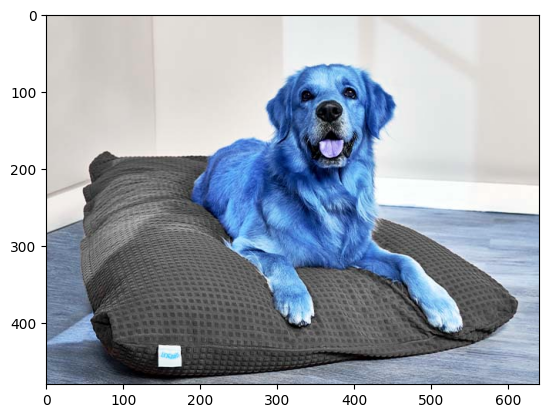

In [33]:
# Predicting on new data

import cv2
import matplotlib.pyplot as plt
test_img = cv2.imread('/content/dog.jpg')

plt.imshow(test_img)

In [34]:
test_img = cv2.resize(test_img, (256,256))
test_input = test_img.reshape((1,256,256,3))

In [35]:
model.predict(test_input)

# 1 => Dog, 0 => Cat

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)

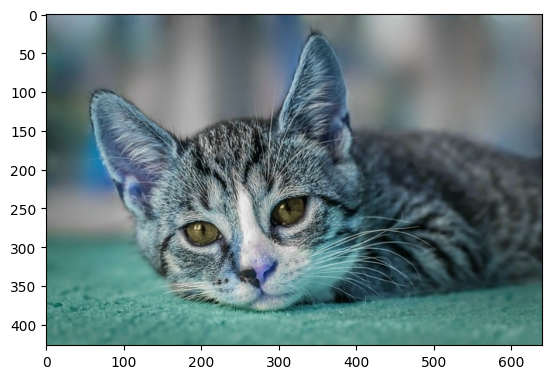

In [36]:
test_img1 = cv2.imread('/content/cat.jpg')

plt.imshow(test_img1)

In [37]:
test_img1 = cv2.resize(test_img1, (256,256))
test_input1 = test_img1.reshape((1,256,256,3))

In [38]:
model.predict(test_input1)
# Predicts wrongly as dog!

1/1 [==============================] - 0s 39ms/step


array([[1.]], dtype=float32)